# Purpose

This notebook is to test whether the `neuro_op` module's nodes can successfully infer `world_dist` if only this distribution's information pieces $x_{world}$ are received (i.e., with rates h>0, r=0).

For this, the model is run with nodes receiving different amount of information (i.e., different `t_max`, `h`). Then, each node's posterior predictive distribution (*PPD*), equalling its forecast of future incoming information, is obtained via 
1. sampling of model parameters $\theta$ proportional to its posterior $p(\theta | x_{world})$;
2. using these sampled model parameters to generate data proportional to the model likelihood $p(x_{PPD}|\theta_{sampled})$

PPDs thereby fully conserves uncertainty by paying respect to both posterior and likelihood stochasticity.

We then use the PPDs to quantify the nodes' modelling accuracy by computing the Kullback-Leibler divergence and average MLE distances between node PPDs and data generated by `world_dist`.

In [1]:
import neuro_op as nop
import matplotlib.pyplot as plt

# import networkx as nx
import numpy as np
import scipy.stats as st

In [2]:
input_dict = dict(
    N_nodes=100,
    N_neighbours=3,
    N_beliefs=500,
    belief_min=-50,
    belief_max=50,
    log_priors=np.zeros(500),
    likelihood=st.norm(loc=0, scale=5),
    world_dist=st.norm(loc=0, scale=5),
    h=1,
    r=1,
    t0=0,
    t_max=10000,
    t_sample=250,
    sample_bins=50,
    sample_opinion_range=[-20, 20],
)

output_variables = [
    "nodes",
    "G",
    "beliefs",
    "world",
    "N_events",
    "t_end",
    "kl_divs_means",
    "t_sample",
    "RANDOM_SEED",
]

In [3]:
params = [[1, 1], [2, 1]]
mus = [[0, 5, 10], [0, 1, 2]]
mu_world_out = 1
mu_world_true = 0
p_end = []
for mu_nodes in mus:
    p_dists = []
    for p_params in params:
        p_dists.append(
            [
                [
                    nop.get_p_distances(mu_i, mu_world_out, p_params[0], p_params[1])
                    for mu_i in mu_nodes
                ],
                [
                    nop.get_p_distances(mu_i, mu_world_true, p_params[0], p_params[1])
                    for mu_i in mu_nodes
                ],
            ]
        )
    p_end.append(p_dists)

vec = np.array(p_end)
print(vec)

vec.mean(axis=3)

[[[[  1   4   9]
   [  0   5  10]]

  [[  1  16  81]
   [  0  25 100]]]


 [[[  1   0   1]
   [  0   1   2]]

  [[  1   0   1]
   [  0   1   4]]]]


array([[[ 4.66666667,  5.        ],
        [32.66666667, 41.66666667]],

       [[ 0.66666667,  1.        ],
        [ 0.66666667,  1.66666667]]])

In [4]:
out1 = dict(zip(output_variables, nop.run_model(**input_dict)))

print(f"Number of events: {out1['N_events']}")

Sampling at t= 0


/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:223: RuntimeWarning: invalid value encountered in divide
  ppd_world_out = ppd_world_out[0] / np.sum(


Sampling at t= 251.38621693813204
Sampling at t= 502.1174337029404


/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: divide by zero encountered in log
  terms = P * np.log(P / Q)
/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: invalid value encountered in multiply
  terms = P * np.log(P / Q)


Sampling at t= 751.2019694805169
Sampling at t= 1000.6941929489102
Sampling at t= 1250.4398742190522
Sampling at t= 1500.0016208440993
Sampling at t= 1750.4077893008264
Sampling at t= 2000.2461060624257
Sampling at t= 2250.0151777617807
Sampling at t= 2500.472492453798
Sampling at t= 2750.572092454068
Sampling at t= 3000.3227788140543
Sampling at t= 3250.573494335436
Sampling at t= 3501.3667328192028
Sampling at t= 3750.025517209603
Sampling at t= 4000.0818105003286
Sampling at t= 4251.449942899979
Sampling at t= 4500.502963807308
Sampling at t= 4750.543180899335
Sampling at t= 5000.441453394155
Sampling at t= 5250.162098308582
Sampling at t= 5500.607012095064
Sampling at t= 5750.3417622584975
Sampling at t= 6000.730393198313
Sampling at t= 6250.7065714855025
Sampling at t= 6500.098145536937
Sampling at t= 6750.21185440756
Sampling at t= 7000.700592946875
Sampling at t= 7250.092699060265
Sampling at t= 7500.629074098689
Sampling at t= 7751.370268681702
Sampling at t= 8000.304138635487


In [5]:
input2_dict = input_dict.copy()
input2_dict["h"] = 0.1
input2_dict["r"] = 5
output2 = dict(zip(output_variables, nop.run_model(**input2_dict)))
print(f"Number of events: {output2['N_events']}")

Sampling at t= 0
Sampling at t= 250.2155493145687
Sampling at t= 500.38386394805445
Sampling at t= 750.1857811344845
Sampling at t= 1000.0069829203499
Sampling at t= 1250.1744054667136
Sampling at t= 1500.2094840782315
Sampling at t= 1750.1326145098114
Sampling at t= 2000.1350290572327
Sampling at t= 2250.205597447217
Sampling at t= 2500.1567824587505
Sampling at t= 2750.5270074021787
Sampling at t= 3000.604032216453
Sampling at t= 3250.2311770035626
Sampling at t= 3500.0158860045
Sampling at t= 3750.350902231963
Sampling at t= 4000.1349144952046
Sampling at t= 4250.163117108084
Sampling at t= 4500.8511806437045
Sampling at t= 4750.129349156877
Sampling at t= 5000.01976172521
Sampling at t= 5250.1263598565765
Sampling at t= 5500.004675646454
Sampling at t= 5750.009208540703
Sampling at t= 6000.0301322377345
Sampling at t= 6250.010913005554
Sampling at t= 6500.074604274079
Sampling at t= 6750.27033898034
Sampling at t= 7000.040902646923
Sampling at t= 7250.131375873075
Sampling at t= 75

## Data analysis

After simulating the network with $h=1, r=0$ (meaning nodes communicating with the central node only), some simple analysis steps follow.



In [6]:
# For improving of readability, increase all font sizes of plots. Also, set legend location to upper right.
plt.rcParams.update(
    {
        "font.size": 20,
        "legend.loc": "upper right",
    }
)

#### Data analysis 1

Firstly, extract output values for further analysis:

In [7]:
 for key, value in output2.items():
    globals()[key] = value


Each node's posteriors are plotted. One should see nodes' posteriors of model parameters (in this case, $\mu$), to converge around the true value. If not, nodes may need more information to converge ($\rightarrow$ increase $t_{max}, h$).


Text(0, 0.5, '$p(\\mu|x_i)$')

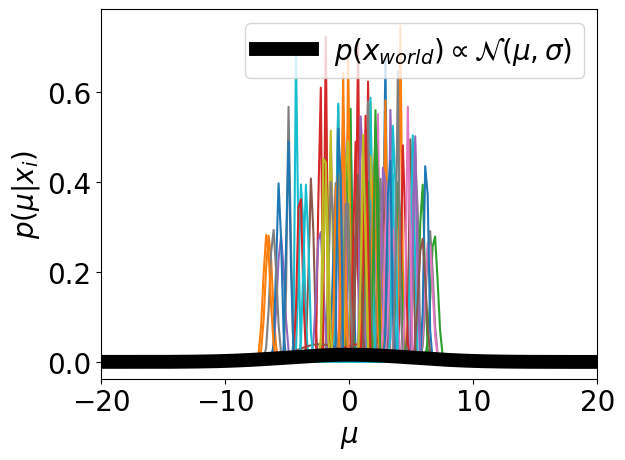

In [8]:
for i, _ in enumerate(nodes):
    plt.plot(nodes[0].beliefs, nop.logpdf_to_pdf(nodes[i].log_probs))
    plt.xlim([-20, 20])
plt.plot(
    beliefs,
    nop.logpdf_to_pdf(world.log_probs),
    color="black",
    linewidth=10,
    label="$p(x_{world}) \propto \mathcal{N}(\mu,\sigma)$",
)
plt.legend()
plt.xlabel("$\mu$")
plt.ylabel("$p(\mu|x_i)$")

#### Data analysis 2

Each node executes posterior predictive distribution sampling to generate a forecast of expected future data.

For some eye-balling analysis, histograms of `world_dist`'s and some nodes' PPD samples are plotted.

In [9]:
# Define parameters of data analysis
N_bins = 50  # go for uneven bin number to have a bin centered on 0
opinion_range = [-20, 20]  # chosen by experience, no formal reasoning

# Generate posterior predictive distributions (PPDs) for each node by generating ppd samples and binning them into histograms
ppd_samples = [
    nop.ppd_Gaussian_mu(node.beliefs, node.log_probs, 10000) for node in nodes
]
ppds = [  # PPD stored as histograms. Each histogram is a tuple (counts, bin_edges).
    np.histogram(
        i,
        bins=N_bins,
        range=opinion_range,
    )
    for i in ppd_samples
]

ppd_world = np.histogram(
    world.diary_out,
    bins=N_bins,
    range=opinion_range,
)

world_binned = nop.dist_binning(world.likelihood, N_bins, opinion_range)

# Save the centre of each node's bin with most samples.
# We then assume 'centres of each node's bin with most samples' == 'maximum likelihood estimates (MLEs) of each node')
argmax = np.argmax(ppd_world[0])
mu_world = (ppd_world[1][argmax] + ppd_world[1][argmax + 1]) / 2

argmax = [np.argmax(ppds_hist[0]) for ppds_hist in ppds]
mu_nodes = [
    (hist_data[1][i] + hist_data[1][i + 1]) / 2 for hist_data, i in zip(ppds, argmax)
]

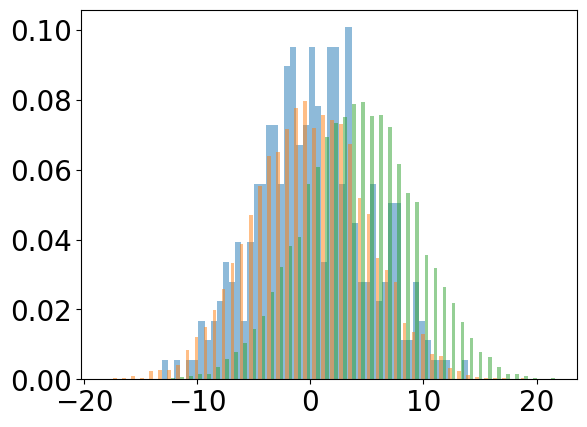

In [10]:
for i in [world.diary_out, ppd_samples[:2]]:
    plt.hist(i, bins=N_bins, density=True, alpha=1 / 2)

In [11]:
a = [[1, 2], [3, 4]]
for i in a:
    print(i)

[1, 2]
[3, 4]


Mean KL divergence:	 0.20545496405432628
Mean linear p-distance:	 3.592
Mean quad. p-distance:	 17.887999999999998


/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: divide by zero encountered in log
  terms = P * np.log(P / Q)
/home/jfriedel/Documents/Repos/neuro_op/src/neuro_op/neuro_op.py:135: RuntimeWarning: invalid value encountered in multiply
  terms = P * np.log(P / Q)


(array([34., 18.,  9.,  4.,  5.,  3.,  5.,  2.,  1.,  0.,  4.,  2.,  2.,
         2.,  2.,  0.,  2.,  2.,  2.,  1.]),
 array([0.00194128, 0.04801925, 0.09409721, 0.14017518, 0.18625315,
        0.23233112, 0.27840909, 0.32448706, 0.37056503, 0.41664299,
        0.46272096, 0.50879893, 0.5548769 , 0.60095487, 0.64703284,
        0.6931108 , 0.73918877, 0.78526674, 0.83134471, 0.87742268,
        0.92350065]),
 <BarContainer object of 20 artists>)

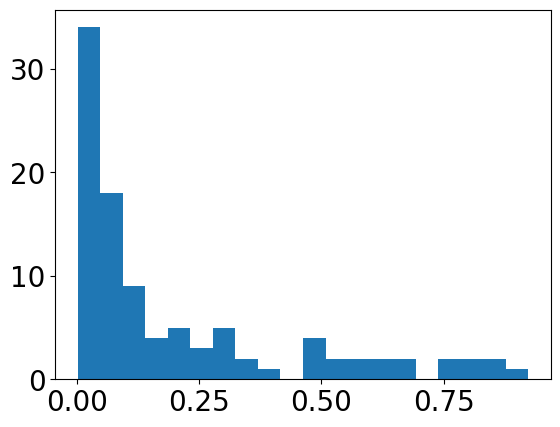

In [13]:
kl_divs = []
for i in ppds:
    P_sampled = i[0] / np.sum(i[0])
    kl_divs.append(nop.kl_divergence(P_sampled, world_binned))

print(f"Mean KL divergence:\t {np.mean(kl_divs)}")
print(
    f"Mean linear p-distance:\t {nop.get_p_distances(mu_nodes, mu_world, p=1)/len(nodes)}"
)
print(
    f"Mean quad. p-distance:\t {nop.get_p_distances(mu_nodes, mu_world, p=2)/len(nodes)}"
)
plt.hist(kl_divs, bins=20)

[array([       nan, 1.57917448]), array([18.29199426,  1.10640152]), array([14.00551003,  0.91835266]), array([12.60236337,  0.82092983]), array([10.27529456,  0.77621881]), array([9.37443346, 0.73411055]), array([8.43768255, 0.69972362]), array([7.99600233, 0.66987989]), array([6.68626955, 0.65859791]), array([5.62303779, 0.63727611]), array([5.52599239, 0.62200228]), array([4.92495211, 0.6056536 ]), array([4.91274018, 0.60323009]), array([3.8619976 , 0.57228187]), array([3.77297689, 0.55053755]), array([3.73842927, 0.54879567]), array([3.75016388, 0.5485636 ]), array([3.58645079, 0.53176338]), array([3.56185   , 0.52715698]), array([3.52687071, 0.52422223]), array([3.45837547, 0.52175506]), array([3.39299011, 0.51773621]), array([3.10468787, 0.51504749]), array([3.02884785, 0.50886189]), array([2.99727156, 0.50571766]), array([3.01751055, 0.49943898]), array([2.98179311, 0.4946271 ]), array([2.99597418, 0.49563583]), array([2.86394622, 0.47768678]), array([2.76028593, 0.46461593]), a

Text(0, 0.5, '$KLD(P(t),Q(t))$')

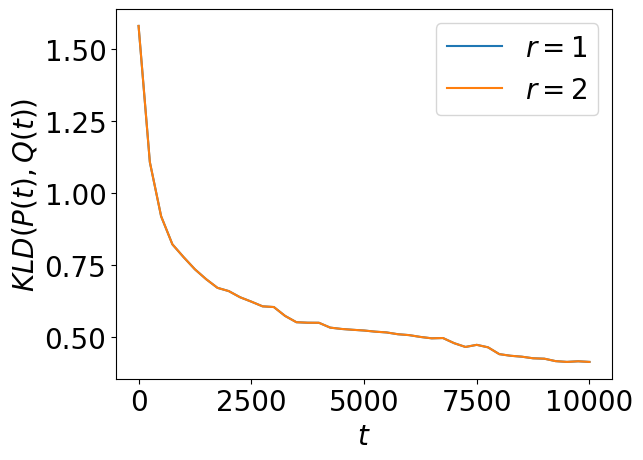

In [ ]:
kld_1 = np.array(kl_divs_means)[:, 1]
kld_2 = np.array(output2["kl_divs_means"])[:, 1]
print(kl_divs_means)

plt.plot(range(0, int(t_end + 1), t_sample), kld_1, label="$r=1$")
plt.plot(range(0, int(t_end + 1), t_sample), kld_2, label="$r=2$")
plt.legend()
plt.xlabel("$t$")
plt.ylabel("$KLD(P(t),Q(t))$")